In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [3]:
image_path = './images'

In [4]:
filenames = get_image_files(image_path)

In [9]:
labels = pd.read_csv('train.csv')
labels.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [10]:
labels_dict = {row[1].Image: row[1].Id for row in labels.iterrows()}

In [8]:
data = ImageDataBunch.from_df(image_path, labels, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_d0ce152, w_14f15a0, w_1b00c27, w_0dfc1eb, w_d285a7a...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [17]:
data = (
    ImageList
        .from_folder('./images')
        .split_by_rand_pct()
        .label_from_func(lambda path: labels_dict[path.name])
        .add_test(ImageList.from_folder('./test'))
        .transform(get_transforms(), size=224)
        .databunch(bs=64 , path='data')
)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_14f15a0, w_25e04d9, w_3e18700, w_dec9108, w_8bcc197...
  if getattr(ds, 'warn', False): warn(ds.warn)


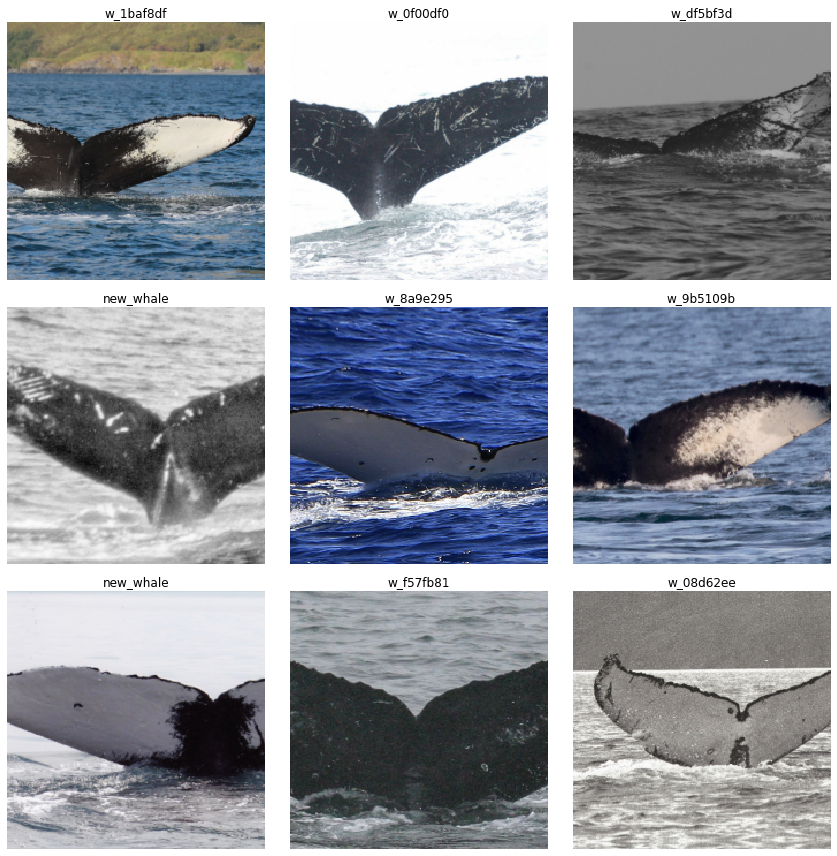

In [18]:
data.show_batch(rows=3)

In [21]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate])

In [ ]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,6.360999,5.027266,0.581529,03:44
